In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [288]:
df = pd.read_csv("overview_2021-01-07.csv")
df = df.drop(columns = ["newDeathsByDeathDate", "areaType", "areaCode", "areaName"])

In [289]:
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
df

,cumCasesByPublishDate,cumDeaths28DaysByDeathDate,newCasesByPublishDate,newDeaths28DaysByPublishDate
date,,,,
2021-01-07,2889419.0,NaN,52618,1162
2021-01-06,2836801.0,78501.0,62322,1041
2021-01-05,2774479.0,78273.0,60916,830
2021-01-04,2713563.0,77786.0,58784,407
2021-01-03,2654779.0,77190.0,54990,455
...,...,...,...,...
2020-07-05,285416.0,40808.0,516,19
2020-06-12,292950.0,39569.0,1541,131
2020-04-19,120067.0,21320.0,5850,432


In [290]:
df = df.sort_index()
df

,cumCasesByPublishDate,cumDeaths28DaysByDeathDate,newCasesByPublishDate,newDeaths28DaysByPublishDate
date,,,,
2020-01-03,NaN,NaN,0,0
2020-01-04,NaN,NaN,0,0
2020-01-05,NaN,NaN,0,0
2020-01-06,NaN,NaN,0,0
2020-01-07,NaN,NaN,0,0
...,...,...,...,...
2021-01-03,2654779.0,77190.0,54990,455
2021-01-04,2713563.0,77786.0,58784,407
2021-01-05,2774479.0,78273.0,60916,830


<AxesSubplot:xlabel='date'>

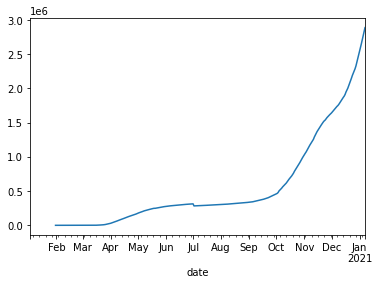

In [291]:
df["cumCasesByPublishDate"].plot()

,cumCasesByPublishDate,cumDeaths28DaysByDeathDate,newCasesByPublishDate,newDeaths28DaysByPublishDate
date,,,,
2020-01-03,NaN,NaN,0,0
2020-01-04,NaN,NaN,0,0
2020-01-05,NaN,NaN,0,0
2020-01-06,NaN,NaN,0,0
2020-01-07,NaN,NaN,0,0


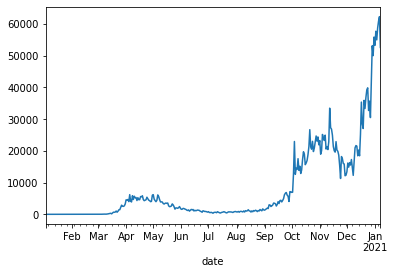

In [292]:
df["newCasesByPublishDate"].plot()
df.head()

<AxesSubplot:xlabel='date'>

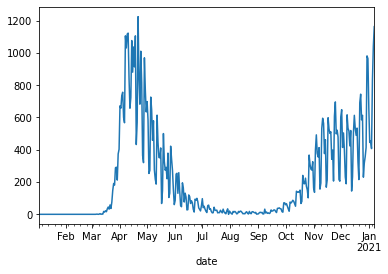

In [293]:
df["newDeaths28DaysByPublishDate"].plot()

<AxesSubplot:xlabel='date'>

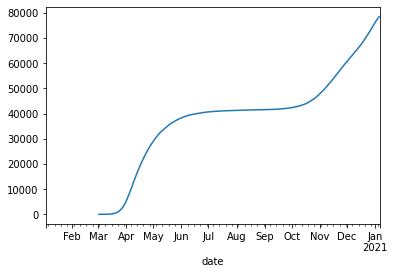

In [294]:
df["cumDeaths28DaysByDeathDate"].plot()

In [295]:
sum(df["cumCasesByPublishDate"].isna()) #Some nan values are present in the cumDeaths
#Not too sure why - no info on gov website - possibly negative values in cases but that seems unlikely. 
#Might have to calculate the cumValues from cases - would make a good exercise to see if they match

28

In [296]:
sum(df["cumDeaths28DaysByDeathDate"].isna()) #Same Issue Again

60

In [297]:
any(df["newCasesByPublishDate"] < 0) 

False

In [298]:
any(df["newDeaths28DaysByPublishDate"] < 0)

False

In [299]:
df["cumCases"] = df["newCasesByPublishDate"].cumsum()
df["cumDeaths"] = df["newDeaths28DaysByPublishDate"].cumsum()

<AxesSubplot:xlabel='date'>

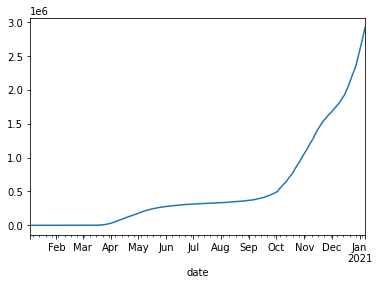

In [306]:
df["cumCases"].plot()

<AxesSubplot:xlabel='date'>

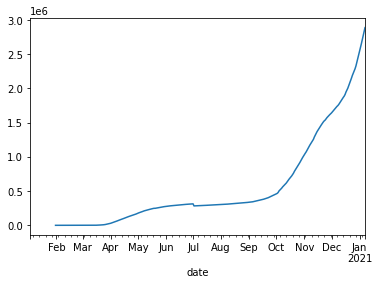

In [305]:
#df["cumCases"].plot()
df["cumCasesByPublishDate"].plot()

In [309]:
df["cumCasesByPublishDate"].loc[df["cumCasesByPublishDate"].isna()]

date
2020-01-03   NaN
2020-01-04   NaN
2020-01-05   NaN
2020-01-06   NaN
2020-01-07   NaN
2020-01-08   NaN
2020-01-09   NaN
2020-01-10   NaN
2020-01-11   NaN
2020-01-12   NaN
2020-01-13   NaN
2020-01-14   NaN
2020-01-15   NaN
2020-01-16   NaN
2020-01-17   NaN
2020-01-18   NaN
2020-01-19   NaN
2020-01-20   NaN
2020-01-21   NaN
2020-01-22   NaN
2020-01-23   NaN
2020-01-24   NaN
2020-01-25   NaN
2020-01-26   NaN
2020-01-27   NaN
2020-01-28   NaN
2020-01-29   NaN
2020-01-30   NaN
Name: cumCasesByPublishDate, dtype: float64

<AxesSubplot:xlabel='date'>

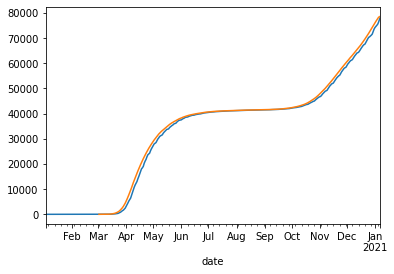

In [301]:
df["cumDeaths"].plot()
df["cumDeaths28DaysByDeathDate"].plot()

In [273]:
#Overall, the cumulative sum seems to be a bit "off"

In [274]:
df["rollCase"] = df["newCasesByPublishDate"].rolling(window = 7 ).mean()
df["rollDeath"] = df["newDeaths28DaysByPublishDate"].rolling(window = 7 ).mean()

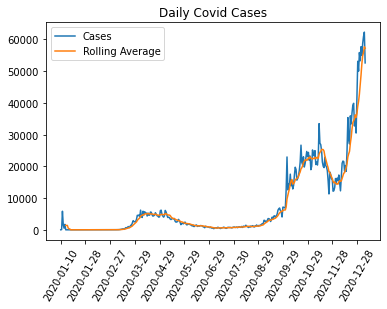

In [275]:
ax = plt.gca()
plt.plot(df["newCasesByPublishDate"], label = "Cases")
plt.plot(df["rollCase"], label = "Rolling Average")
ax.axes.xaxis.set_visible(True)
plt.xticks(df.index[::30], rotation = 60)
plt.title("Daily Covid Cases")
plt.legend()
plt.show()

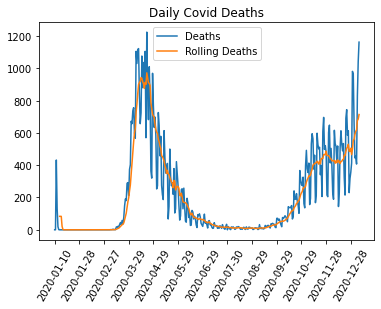

In [276]:
ax = plt.gca()
plt.plot(df["newDeaths28DaysByPublishDate"], label = "Deaths")
plt.plot(df["rollDeath"], label = "Rolling Deaths")
ax.axes.xaxis.set_visible(True)
plt.xticks(df.index[::30], rotation = 60)
plt.title("Daily Covid Deaths")
plt.legend()
plt.show()

In [277]:
df = df.drop(columns = ["cumCasesByPublishDate", "cumDeaths28DaysByDeathDate"])
df

,newCasesByPublishDate,newDeaths28DaysByPublishDate,cumCases,cumDeaths,rollCase,rollDeath
date,,,,,,
2020-01-10,0,0,0,0,NaN,NaN
2020-03-08,65,0,65,0,NaN,NaN
2020-04-19,5850,432,5915,432,NaN,NaN
2020-06-12,1541,131,7456,563,NaN,NaN
2020-07-05,516,19,7972,582,NaN,NaN
...,...,...,...,...,...,...
2021-01-03,54990,455,2686534,75090,52347.857143,610.285714
2021-01-04,58784,407,2745318,75497,54833.428571,617.428571
2021-01-05,60916,830,2806234,76327,55945.000000,676.857143


In [310]:
dfTest = pd.read_csv("covid_test.csv")
dfTest["date"] = pd.to_datetime(dfTest["date"])
dfTest = dfTest.set_index("date")
dfTest = dfTest.sort_index()
dfTest

,areaType,areaCode,areaName,newTestsByPublishDate
date,,,,
2020-03-31,overview,K02000001,United Kingdom,11896
2020-04-01,overview,K02000001,United Kingdom,11947
2020-04-02,overview,K02000001,United Kingdom,13623
2020-04-03,overview,K02000001,United Kingdom,14629
2020-04-04,overview,K02000001,United Kingdom,16080
...,...,...,...,...
2021-01-03,overview,K02000001,United Kingdom,429488
2021-01-04,overview,K02000001,United Kingdom,466600
2021-01-05,overview,K02000001,United Kingdom,501324


In [313]:
dfTest = dfTest.drop(columns = ["areaType", "areaCode", "areaName"])
dfTest

,newTestsByPublishDate
date,
2020-03-31,11896
2020-04-01,11947
2020-04-02,13623
2020-04-03,14629
2020-04-04,16080
...,...
2021-01-03,429488
2021-01-04,466600
2021-01-05,501324


<AxesSubplot:xlabel='date'>

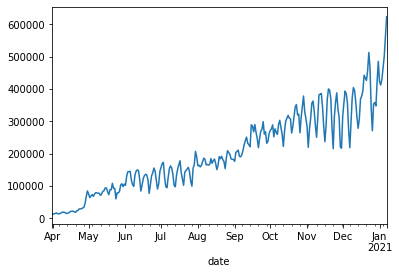

In [314]:
dfTest["newTestsByPublishDate"].plot()

In [315]:
df.loc[dfTest.index, "dailyTest"] = dfTest["newTestsByPublishDate"]
df["dailyTest"]

date
2020-01-03         NaN
2020-01-04         NaN
2020-01-05         NaN
2020-01-06         NaN
2020-01-07         NaN
                ...   
2021-01-03    429488.0
2021-01-04    466600.0
2021-01-05    501324.0
2021-01-06    561217.0
2021-01-07    623787.0
Name: dailyTest, Length: 371, dtype: float64

<AxesSubplot:xlabel='date'>

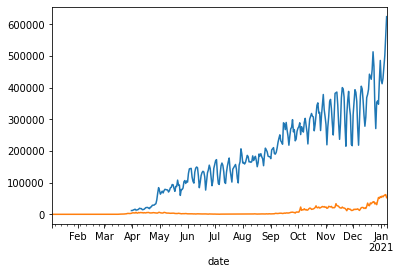

In [317]:
df["dailyTest"].plot()
df["newCasesByPublishDate"].plot()

In [323]:
df["percentPos"] = [df["newCasesByPublishDate"].loc[i]/df["dailyTest"].loc[i] for i in df.index]

<AxesSubplot:xlabel='date'>

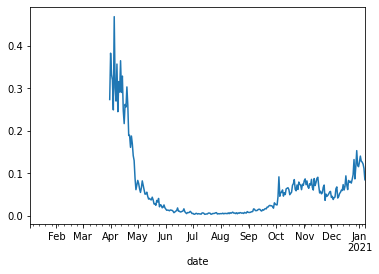

In [325]:
df["percentPos"].plot()

In [326]:
df.to_csv("finData.csv")